In [49]:
import requests
import pprint
from datetime import datetime, timedelta, timezone
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
from matplotlib import font_manager
font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family
plt.rcParams["axes.unicode_minus"] = False


In [51]:
city_name = 'Seoul'
country_code = 'KR'
API_key = 'c08cc8fd7759dfb529f80ccec1f70f12'
units = 'metric'
api_call = f"https://api.openweathermap.org/data/2.5/forecast?q={city_name},{country_code}&appid={API_key}&lang={country_code}&units={units}"


In [52]:
data = requests.get(api_call).json()
pprint.pprint(data)

{'city': {'coord': {'lat': 37.5683, 'lon': 126.9778},
          'country': 'KR',
          'id': 1835848,
          'name': 'Seoul',
          'population': 10349312,
          'sunrise': 1682369088,
          'sunset': 1682417713,
          'timezone': 32400},
 'cnt': 40,
 'cod': '200',
 'list': [{'clouds': {'all': 83},
           'dt': 1682413200,
           'dt_txt': '2023-04-25 09:00:00',
           'main': {'feels_like': 10.12,
                    'grnd_level': 1005,
                    'humidity': 63,
                    'pressure': 1013,
                    'sea_level': 1013,
                    'temp': 11.29,
                    'temp_kf': -1.09,
                    'temp_max': 12.38,
                    'temp_min': 11.29},
           'pop': 0.15,
           'sys': {'pod': 'd'},
           'visibility': 10000,
           'weather': [{'description': '튼구름',
                        'icon': '04d',
                        'id': 803,
                        'main': 'Clouds'}],
      

In [53]:
data.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [54]:
# 시간을 불러와주는 함수
def now_time(tstamp=None):
    # 한국의 시차 timedelta
    td = timedelta(9)
    # 시차정보로 timezone을 만듬
    tz = timezone(td, "KST")
    # tstamp가 있으면 tstamp로 없으면 now()로
    if tstamp:
        dt = datetime(tstamp, tz)
    else:
        dt = datetime.now(tz)
    # pass   
    # return f'{}{}{}{}{}{}{}{}{}'

In [55]:
for wcast in data['list']:
    print('{}  {}도  ({})  습도{}%'
          .format(wcast['dt_txt'],wcast['main']['temp'], wcast['weather'][0]['description'], wcast['main']['humidity']))

2023-04-25 09:00:00  11.29도  (튼구름)  습도63%
2023-04-25 12:00:00  11.22도  (온흐림)  습도60%
2023-04-25 15:00:00  10.01도  (구름조금)  습도68%
2023-04-25 18:00:00  9.48도  (구름조금)  습도76%
2023-04-25 21:00:00  9.46도  (실 비)  습도83%
2023-04-26 00:00:00  10.06도  (실 비)  습도54%
2023-04-26 03:00:00  10.84도  (튼구름)  습도45%
2023-04-26 06:00:00  14.64도  (구름조금)  습도35%
2023-04-26 09:00:00  15.14도  (맑음)  습도37%
2023-04-26 12:00:00  12.52도  (맑음)  습도50%
2023-04-26 15:00:00  11.32도  (맑음)  습도56%
2023-04-26 18:00:00  10.03도  (맑음)  습도65%
2023-04-26 21:00:00  8.81도  (맑음)  습도67%
2023-04-27 00:00:00  12.57도  (맑음)  습도47%
2023-04-27 03:00:00  17.44도  (맑음)  습도26%
2023-04-27 06:00:00  19.34도  (맑음)  습도16%
2023-04-27 09:00:00  16.63도  (약간의 구름이 낀 하늘)  습도22%
2023-04-27 12:00:00  14.11도  (맑음)  습도26%
2023-04-27 15:00:00  12.92도  (튼구름)  습도30%
2023-04-27 18:00:00  11.95도  (온흐림)  습도35%
2023-04-27 21:00:00  11.67도  (온흐림)  습도36%
2023-04-28 00:00:00  13.61도  (온흐림)  습도48%
2023-04-28 03:00:00  18.34도  (온흐림)  습도30%
2023-04-28 06:00:00  20.07도  (튼구름)

In [56]:
dt = []
temp = []
humidity = []
weather = []

In [57]:
data2 = {
    '날짜' : [],
    '기온' : [],
    '날씨' : [],
    '습도' : []
}

for wcast in data['list']:
    data2['날짜'].append(wcast['dt_txt']) 
    data2['기온'].append(wcast['main']['temp'])
    data2['날씨'].append(wcast['weather'][0]['description'])
    data2['습도'].append(wcast['main']['humidity'])
    
pprint.pprint(data2)

{'기온': [11.29,
        11.22,
        10.01,
        9.48,
        9.46,
        10.06,
        10.84,
        14.64,
        15.14,
        12.52,
        11.32,
        10.03,
        8.81,
        12.57,
        17.44,
        19.34,
        16.63,
        14.11,
        12.92,
        11.95,
        11.67,
        13.61,
        18.34,
        20.07,
        15.6,
        14.71,
        14.56,
        14.26,
        14.45,
        17.26,
        21.76,
        24.27,
        21.3,
        14.01,
        13.55,
        11.65,
        10.7,
        11.51,
        14.73,
        17.02],
 '날씨': ['튼구름',
        '온흐림',
        '구름조금',
        '구름조금',
        '실 비',
        '실 비',
        '튼구름',
        '구름조금',
        '맑음',
        '맑음',
        '맑음',
        '맑음',
        '맑음',
        '맑음',
        '맑음',
        '맑음',
        '약간의 구름이 낀 하늘',
        '맑음',
        '튼구름',
        '온흐림',
        '온흐림',
        '온흐림',
        '온흐림',
        '튼구름',
        '온흐림',
        '실 비',
        '온흐림

In [58]:
data3 = {
    '날짜' : [],
    '기온' : [],
    '날씨' : [],
    '습도' : [],
    '강수' : []
}

for wcast in data['list']:
    data3['날짜'].append(wcast['dt_txt'][:-3]) 
    data3['기온'].append(wcast['main']['temp'])
    data3['날씨'].append(wcast['weather'][0]['description'])
    data3['습도'].append(wcast['main']['humidity'])
    if 'rain' in wcast :
        data3['강수'].append(wcast['rain']['3h'])
    else:
        data3['강수'].append(0)
pprint.pprint(data3)

{'기온': [11.29,
        11.22,
        10.01,
        9.48,
        9.46,
        10.06,
        10.84,
        14.64,
        15.14,
        12.52,
        11.32,
        10.03,
        8.81,
        12.57,
        17.44,
        19.34,
        16.63,
        14.11,
        12.92,
        11.95,
        11.67,
        13.61,
        18.34,
        20.07,
        15.6,
        14.71,
        14.56,
        14.26,
        14.45,
        17.26,
        21.76,
        24.27,
        21.3,
        14.01,
        13.55,
        11.65,
        10.7,
        11.51,
        14.73,
        17.02],
 '날씨': ['튼구름',
        '온흐림',
        '구름조금',
        '구름조금',
        '실 비',
        '실 비',
        '튼구름',
        '구름조금',
        '맑음',
        '맑음',
        '맑음',
        '맑음',
        '맑음',
        '맑음',
        '맑음',
        '맑음',
        '약간의 구름이 낀 하늘',
        '맑음',
        '튼구름',
        '온흐림',
        '온흐림',
        '온흐림',
        '온흐림',
        '튼구름',
        '온흐림',
        '실 비',
        '온흐림

In [98]:
df2 = pd.DataFrame(data3).set_index('날짜')
df2

,기온,날씨,습도,강수
날짜,,,,
2023-04-25 09:00:00,11.29,튼구름,63,0.00
2023-04-25 12:00:00,11.22,온흐림,60,0.00
2023-04-25 15:00:00,10.01,구름조금,68,0.00
2023-04-25 18:00:00,9.48,구름조금,76,0.00
2023-04-25 21:00:00,9.46,실 비,83,0.21
2023-04-26 00:00:00,10.06,실 비,54,0.28
2023-04-26 03:00:00,10.84,튼구름,45,0.00
2023-04-26 06:00:00,14.64,구름조금,35,0.00
2023-04-26 09:00:00,15.14,맑음,37,0.00


In [60]:
df = pd.DataFrame(data2).set_index('날짜')
df.head()

,기온,날씨,습도
날짜,,,
2023-04-25 09:00:00,11.29,튼구름,63
2023-04-25 12:00:00,11.22,온흐림,60
2023-04-25 15:00:00,10.01,구름조금,68
2023-04-25 18:00:00,9.48,구름조금,76
2023-04-25 21:00:00,9.46,실 비,83


In [61]:
df.reset_index()

,날짜,기온,날씨,습도
0,2023-04-25 09:00:00,11.29,튼구름,63
1,2023-04-25 12:00:00,11.22,온흐림,60
2,2023-04-25 15:00:00,10.01,구름조금,68
3,2023-04-25 18:00:00,9.48,구름조금,76
4,2023-04-25 21:00:00,9.46,실 비,83
5,2023-04-26 00:00:00,10.06,실 비,54
6,2023-04-26 03:00:00,10.84,튼구름,45
7,2023-04-26 06:00:00,14.64,구름조금,35
8,2023-04-26 09:00:00,15.14,맑음,37
9,2023-04-26 12:00:00,12.52,맑음,50


In [107]:
x_label = [df[2:-3] for df in df.index[::4]]

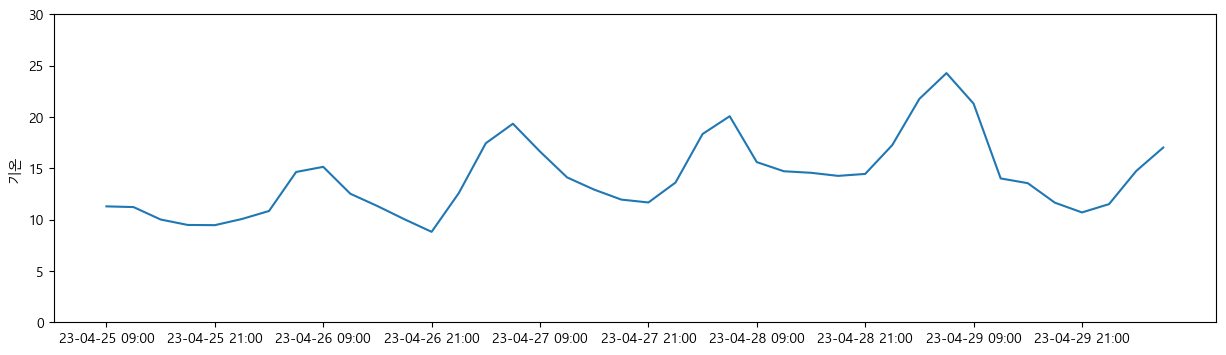

In [108]:
plt.figure(figsize=(15,4))
plt.subplot(1, 1, 1)
plt.plot(df['기온'])
plt.ylabel('기온')
plt.ylim(0, 30)
plt.xticks(range(0,40,4),labels=x_label, rotation=0)

plt.show()

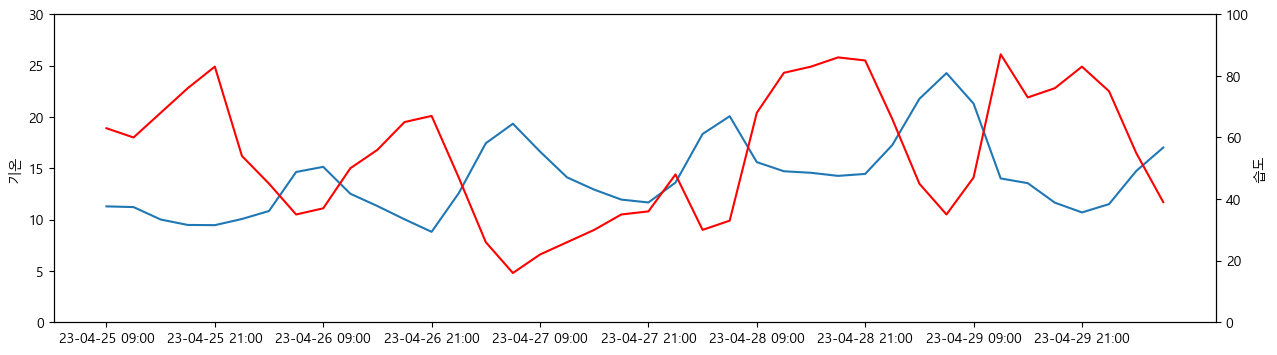

In [109]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

ax1.plot(df2['기온'])
ax1.set_ylabel('기온')
ax1.set_ylim(0, 30)
ax1.set_xticks(range(0,40,4),labels=x_label, rotation=0)

ax2.plot(df2['습도'],color='red')
ax2.set_ylabel('습도')
ax2.set_ylim(0,100)

plt.show()